<a href="https://colab.research.google.com/github/gautumsvp7/SolarDataSetPublic/blob/main/Solar_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving solar-energy-production-sites-1.csv to solar-energy-production-sites-1.csv


In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [3]:
df = pd.read_csv(io.BytesIO(uploaded['solar-energy-production-sites-1.csv'])) 
print(df)

                          Facility Name  ...                                 Address / Location
0    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
1    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
2    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
3    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
4    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
..                                  ...  ...                                                ...
377                    Ed Fountain Park  ...  1400 N Decatur Blvd\nLas Vegas, NV 89108\n(36....
378    Durango Hills Community Center S  ...  3521 N Durango Dr\nLas Vegas, NV 89129\n(36.22...
379                     Fire Station 44  ...  7701 W Washington Ave\nLas Vegas, NV 89128\n(3...
380               Centennial Hills Park 

In [4]:
df.head()

,Facility Name,KW Rating,KWH Generated,Date,Generated,Address / Location
0,Veterans Memorial Community Center,116.2,218498,07/01/2014 12:00:00 AM,22603,"101 S Pavilion Center\nLas Vegas, NV 89144\n"
1,Veterans Memorial Community Center,116.2,218498,08/01/2014 12:00:00 AM,23330,"101 S Pavilion Center\nLas Vegas, NV 89144\n"
2,Veterans Memorial Community Center,116.2,218498,09/01/2014 12:00:00 AM,17678,"101 S Pavilion Center\nLas Vegas, NV 89144\n"
3,Veterans Memorial Community Center,116.2,218498,10/01/2014 12:00:00 AM,14427,"101 S Pavilion Center\nLas Vegas, NV 89144\n"
4,Veterans Memorial Community Center,116.2,218498,11/01/2014 12:00:00 AM,10828,"101 S Pavilion Center\nLas Vegas, NV 89144\n"


In [5]:
df.describe()

,KW Rating,KWH Generated,Generated
count,382.000000,3.820000e+02,382.000000
mean,195.302618,3.724244e+05,32259.801047
std,658.166173,1.338346e+06,119224.015824
min,15.300000,2.745200e+04,1136.000000
25%,30.100000,4.942500e+04,4245.750000
50%,44.500000,7.208900e+04,6697.000000
75%,100.000000,1.468800e+05,11163.000000
max,3334.000000,6.759539e+06,805458.000000


In [6]:
print(df.groupby('Facility Name').size())

Facility Name
All American Park                           9
Centennial Hills Community Center N & S     9
Centennial Hills Park                      11
Durango Hills Community Center S           10
East Las Vegas Community Center            13
East Yard - Fire Equipment Center           9
East Yard - Main Gate 1                    17
East Yard - Sign Shop                      17
Ed Fountain Park                            9
Fire Station 10                            13
Fire Station 106                            8
Fire Station 107                            9
Fire Station 41                            13
Fire Station 43                            14
Fire Station 44                            13
Fire Station 45                            13
Fire Station 48                            13
Fire Station 5                             13
Fire Station 6                             13
Fire Station 7                             13
Fire Station 8                             13
Lorenzi Park        

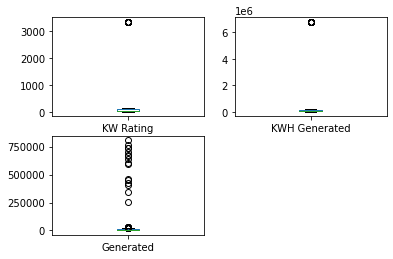

In [7]:
#Data Visualiztion
df.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey =False)
plt.show()

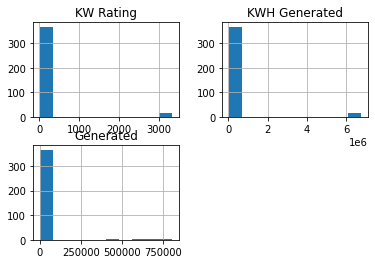

In [8]:
df.hist()
plt.show()

In [11]:
copy_df = df
f_names =set(copy_df['Facility Name'])


In [12]:
for col in copy_df.columns:
  print(col)

Facility Name
KW Rating
KWH Generated
Date
Generated
Address / Location


In [13]:
trimmed_df=copy_df.drop(['Date','Address / Location'],axis=1)

In [14]:
trimmed_df

,Facility Name,KW Rating,KWH Generated,Generated
0,Veterans Memorial Community Center,116.2,218498,22603
1,Veterans Memorial Community Center,116.2,218498,23330
2,Veterans Memorial Community Center,116.2,218498,17678
3,Veterans Memorial Community Center,116.2,218498,14427
4,Veterans Memorial Community Center,116.2,218498,10828
...,...,...,...,...
377,Ed Fountain Park,144.5,151050,20100
378,Durango Hills Community Center S,33.6,45246,2832
379,Fire Station 44,30.0,57914,6012
380,Centennial Hills Park,30.1,38876,4998


In [15]:
#creating dictionary to replace the names for easier analysis
list_loc = list(f_names)
d_loc = {}
ni = 0
for i in list_loc:
  d_loc[i] = ni
  ni += 1
print(d_loc)
#print(f_names)

{'Fire Station 8': 0, 'Mirabelli Community Center': 1, 'Fire Station 106': 2, 'Fire Station 6': 3, 'Fire Station 41': 4, 'Stupak Community Center': 5, 'Veterans Memorial Community Center': 6, 'West Yard - Vehicle Services': 7, 'Fire Station 10': 8, 'Centennial Hills Park': 9, 'Fire Station 43': 10, 'Fire Station 5': 11, 'All American Park': 12, 'Fire Station 48': 13, 'Natural History Museum': 14, 'Durango Hills Community Center S': 15, 'West Yard - EOC': 16, 'Centennial Hills Community Center N & S': 17, 'WPCF Plant': 18, 'Rainbow Park': 19, 'Fire Station 107': 20, 'West Yard - Operations-Maintenance': 21, 'Fire Station 44': 22, 'East Yard - Sign Shop': 23, 'East Yard - Fire Equipment Center': 24, 'Ed Fountain Park': 25, 'Lorenzi Park': 26, 'Fire Station 45': 27, 'Fire Station 7': 28, 'East Las Vegas Community Center': 29, 'East Yard - Main Gate 1': 30}


In [16]:
test_df = trimmed_df

In [17]:
nest_d = {'Facility Name':d_loc}
print(nest_d)

{'Facility Name': {'Fire Station 8': 0, 'Mirabelli Community Center': 1, 'Fire Station 106': 2, 'Fire Station 6': 3, 'Fire Station 41': 4, 'Stupak Community Center': 5, 'Veterans Memorial Community Center': 6, 'West Yard - Vehicle Services': 7, 'Fire Station 10': 8, 'Centennial Hills Park': 9, 'Fire Station 43': 10, 'Fire Station 5': 11, 'All American Park': 12, 'Fire Station 48': 13, 'Natural History Museum': 14, 'Durango Hills Community Center S': 15, 'West Yard - EOC': 16, 'Centennial Hills Community Center N & S': 17, 'WPCF Plant': 18, 'Rainbow Park': 19, 'Fire Station 107': 20, 'West Yard - Operations-Maintenance': 21, 'Fire Station 44': 22, 'East Yard - Sign Shop': 23, 'East Yard - Fire Equipment Center': 24, 'Ed Fountain Park': 25, 'Lorenzi Park': 26, 'Fire Station 45': 27, 'Fire Station 7': 28, 'East Las Vegas Community Center': 29, 'East Yard - Main Gate 1': 30}}


In [24]:
final_df = test_df.replace(to_replace = nest_d, value= None)

final_df should be used from this point onwards.

# Training a model

In [30]:

array = final_df.values
print(array)

[[6.00000e+00 1.16200e+02 2.18498e+05 2.26030e+04]
 [6.00000e+00 1.16200e+02 2.18498e+05 2.33300e+04]
 [6.00000e+00 1.16200e+02 2.18498e+05 1.76780e+04]
 ...
 [2.20000e+01 3.00000e+01 5.79140e+04 6.01200e+03]
 [9.00000e+00 3.01000e+01 3.88760e+04 4.99800e+03]
 [2.10000e+01 7.93000e+01 1.46880e+05 1.09600e+04]]


In [31]:
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.2
seed = 7
X_train,X_validation,Y_train,Y_validation = model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

IndexError: ignored